# Set Up 

In [1]:
import math, random

import umap
import networkx as nx
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium 

from sklearn.preprocessing import MinMaxScaler 
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

import sequencer 

from data_processing.preprocessor import *
from utils.clustring_utils import * 

In [2]:
def add_color(x) : 
    return colors_dict[x] 

colors_dict ={0:"red" ,1 :"green"  , 2 : "orange" }

# Load Data

In [3]:
prep = preprocessor('/home/amine/University_Project/ml_geodetic_project/Data')

In [4]:
meta_data = prep.get_per_of_bad_obs_per_station()
meta_data.head()

station: B033 , year : 2018
station: B033 , year : 2019
station: B033 , year : 2020
station: B205 , year : 2013
station: B205 , year : 2014
station: B205 , year : 2015
station: B205 , year : 2016
station: B205 , year : 2017
station: B205 , year : 2018
station: B205 , year : 2019
station: B205 , year : 2020
station: B206 , year : 2017
station: B206 , year : 2018
station: B206 , year : 2019
station: B206 , year : 2020


Station   Latitude   Longitude  Elevation start_date end_date  bad_obs_mean
0    B001  48.043070 -123.131410      237.0       2005     2020      0.263508
1    B003  48.062360 -124.140860      314.0       2005     2020      0.007526
2    B004  48.201925 -124.427006       30.0       2005     2020      0.003905
3    B005  48.059549 -123.503278      302.7       2005     2020      0.012685
4    B006  48.058800 -123.500800      302.0       2005     2020      0.002934

In [5]:
selected_stations = meta_data[meta_data['bad_obs_mean']<0.0025]

In [6]:
selected_stations

Station   Latitude   Longitude  Elevation start_date end_date  bad_obs_mean
6     B009  48.648667 -123.451167       15.0       2005     2020      0.002406
8     B011  48.649543 -123.448192       22.0       2005     2020      0.001296
14    B019  46.652700 -123.651800        9.0       2009     2020      0.001035
30    B045  40.436000 -123.996500       29.4       2009     2020      0.001158
31    B054  37.860200 -122.199500      405.6       2012     2020      0.002220
32    B057  38.027300 -122.565500       14.4       2008     2020      0.000616
38    B073  35.946700 -120.471700      535.3       2006     2020      0.002130
64    B921  35.586500 -117.462200      694.5       2008     2020      0.002010
66    B927  49.218800 -124.813300       98.7       2008     2020      0.000304

In [7]:
map_osm = folium.Map(location=[35.9467, -120.4717], zoom_start=4)
selected_stations.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                              radius=25,fill_color='green',popup=row['Station'],fill_opacity=0.5,)
                                             .add_to(map_osm), axis=1)
map_osm

In [8]:
stations = selected_stations.Station.values
prep.load( stations = stations, 
           start_date = 2020, 
           end_date = 2020 , 
           flag_filter = 'linear' , 
           verbose = False , 
           detrending = 'diff')

In [9]:
prep.data.dropna(inplace = True)
prep.data.head()


areal_strain_B009  areal_strain_detrended_B009  \
date                                                                  
2020-01-01 00:05:00            0.53906                      0.00040   
2020-01-01 00:10:00            0.53822                     -0.00084   
2020-01-01 00:15:00            0.53796                     -0.00026   
2020-01-01 00:20:00            0.53841                      0.00045   
2020-01-01 00:25:00            0.53944                      0.00103   

                     differential_strain_B009  \
date                                            
2020-01-01 00:05:00                  -2.34289   
2020-01-01 00:10:00                  -2.34313   
2020-01-01 00:15:00                  -2.34365   
2020-01-01 00:20:00                  -2.34371   
2020-01-01 00:25:00                  -2.34331   

                     differential_strain_detrended_B009  shear_strain_B009  \
date                                                                         
2020-01-01 00:05:00                             0.00025           -2.55800   
2020-01-01 00:10:00                            -0.00024           -2.55792   
2020-01-01 00:15:00                            -0.00052           -2.55814   
2020-01-01 00:20:00                            -0.00006           -2.55875   
2020-01-01 00:25:00                             0.00040           -2.55894   

                     shear_strain_detrended_B009  areal_strain_B011  \
date                                                                  
2020-01-01 00:05:00                     -0.00027            1.27156   
2020-01-01 00:10:00                      0.00008            1.27167   
2020-01-01 00:15:00                     -0.00022            1.27278   
2020-01-01 00:20:00                     -0.00061            1.27437   
2020-01-01 00:25:00                     -0.00019            1.27525   

                     areal_strain_detrended_B011  differential_strain_B011  \
date                                                                         
2020-01-01 00:05:00                     -0.00021                   1.15355   
2020-01-01 00:10:00                      0.00011                   1.15445   
2020-01-01 00:15:00                      0.00111                   1.15570   
2020-01-01 00:20:00                      0.00159                   1.15592   
2020-01-01 00:25:00                      0.00088                   1.15505   

                     differential_strain_detrended_B011  ...  \
date                                                     ...   
2020-01-01 00:05:00                            -0.00106  ...   
2020-01-01 00:10:00                             0.00090  ...   
2020-01-01 00:15:00                             0.00125  ...   
2020-01-01 00:20:00                             0.00022  ...   
2020-01-01 00:25:00                            -0.00087  ...   

                     differential_strain_B921  \
date                                            
2020-01-01 00:05:00                  -1.20229   
2020-01-01 00:10:00                  -1.20228   
2020-01-01 00:15:00                  -1.20225   
2020-01-01 00:20:00                  -1.20222   
2020-01-01 00:25:00                  -1.20222   

                     differential_strain_detrended_B921  shear_strain_B921  \
date                                                                         
2020-01-01 00:05:00                        0.000000e+00           -0.78192   
2020-01-01 00:10:00                        1.000000e-05           -0.78194   
2020-01-01 00:15:00                        3.000000e-05           -0.78193   
2020-01-01 00:20:00                        3.000000e-05           -0.78195   
2020-01-01 00:25:00                       -7.105427e-15           -0.78200   

                     shear_strain_detrended_B921  areal_strain_B927  \
date                                                                  
2020-01-01 00:05:00                     -0.00002            0.09010   
2020-01-01 00:10:00               

# EDA

# Correlation 

In [10]:
def correlation_plot(data,columns=None):
    if columns!=None:
        data=data[columns]
        f, ax = plt.subplots(figsize= [10,8])
        sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, 
                  cbar_kws={'label': 'Correlation Coefficient'}, cmap='viridis')
        ax.set_title("Correlation Matrix for different strains ", fontsize=18)
        return data.corr()        
        plt.show()

def plot_heatmap(data ,  title )  : 
    f, ax = plt.subplots(figsize= [10,8])
    sns.heatmap(data, annot=True, fmt=".2f", ax=ax, cmap='viridis')
    ax.set_title( title , fontsize=18)

### Differential Strain  

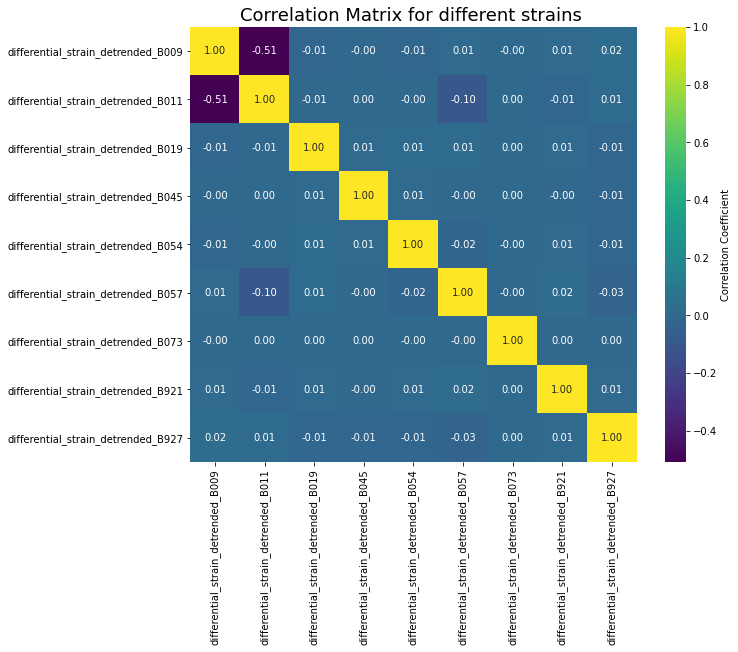

In [11]:
col = [x for x in prep.data.columns if 'differential_strain_detrended' in x ]
diff_strain_corr = correlation_plot(prep.data , col)

### Shear Strain  

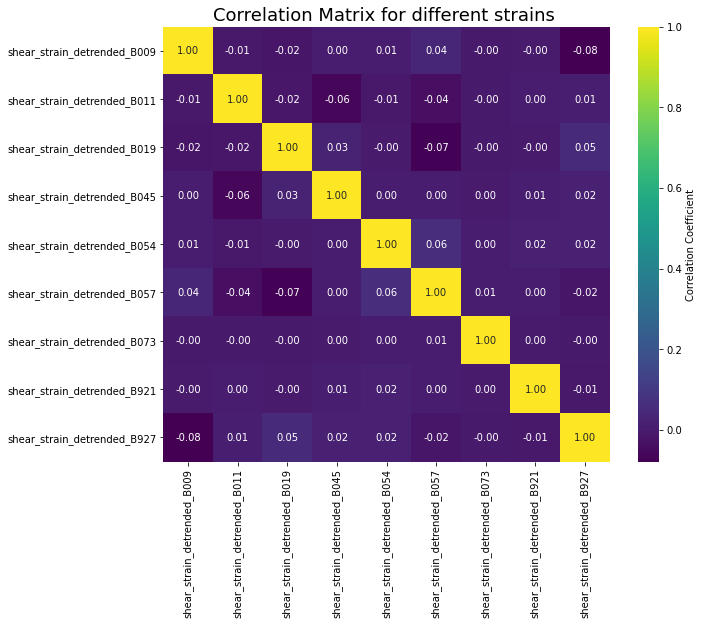

In [12]:
col = [x for x in prep.data.columns if 'shear_strain_detrended' in x ]
shear_strain_corr = correlation_plot(prep.data , col)

### Areal strain

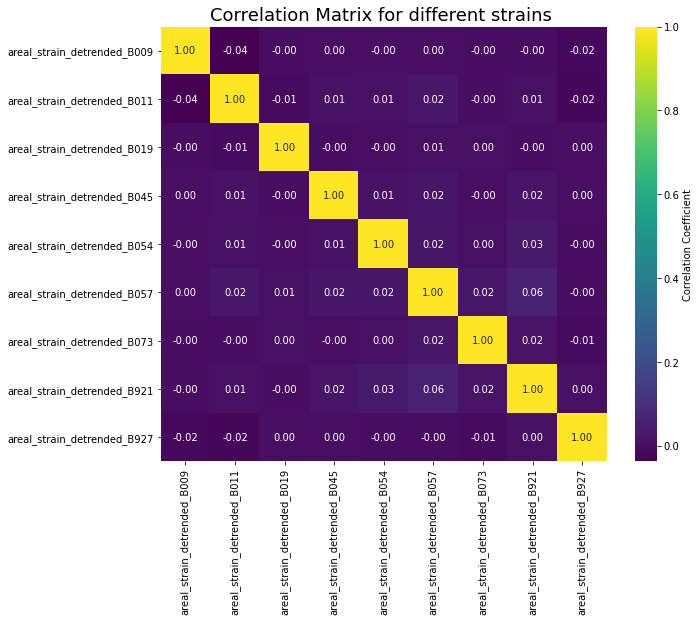

In [13]:
col = [x for x in prep.data.columns if 'areal_strain_detrended' in x ]
areal_strain_corr = correlation_plot(prep.data , col)

## Differential strain analysis

In [14]:
feat = 'differential_strain_detrended'
Series , namesofSeries = get_series(prep.data , feat, stations)


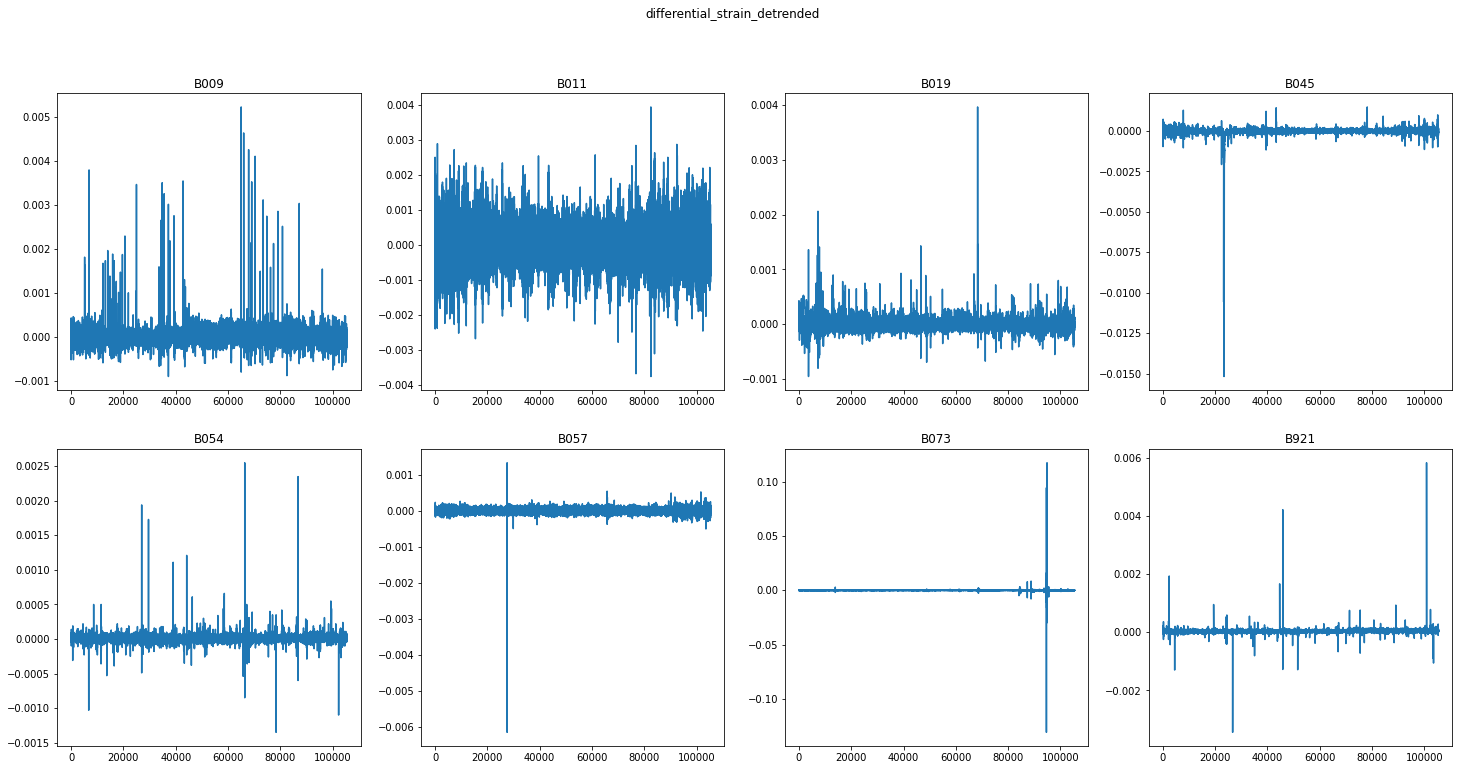

In [15]:
plots( Series ,namesofSeries , feat)

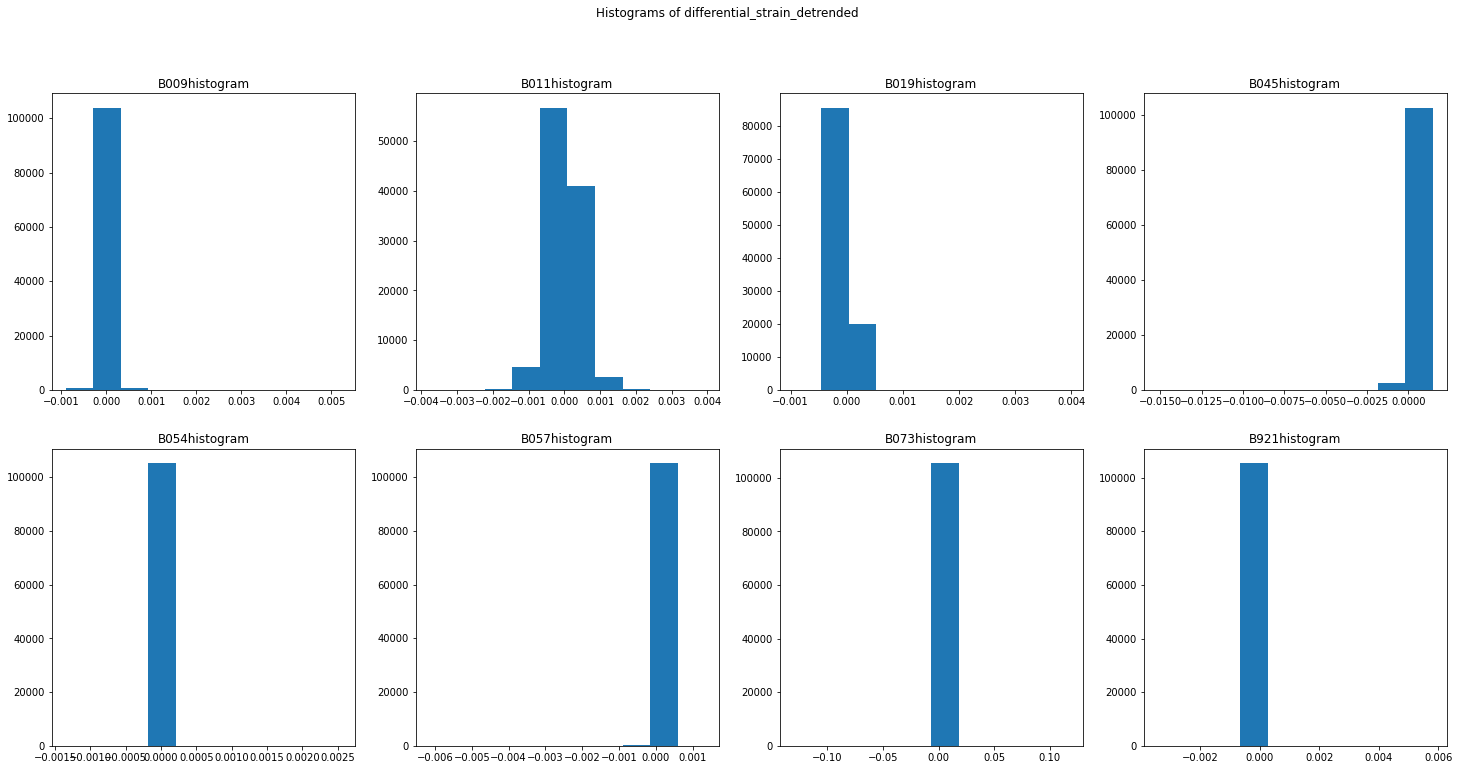

In [16]:
plot_histogram( Series ,namesofSeries , feat)

## Shear strain analysis

In [17]:
feat = 'shear_strain_detrended'
Series , namesofSeries = get_series(prep.data , feat, stations)

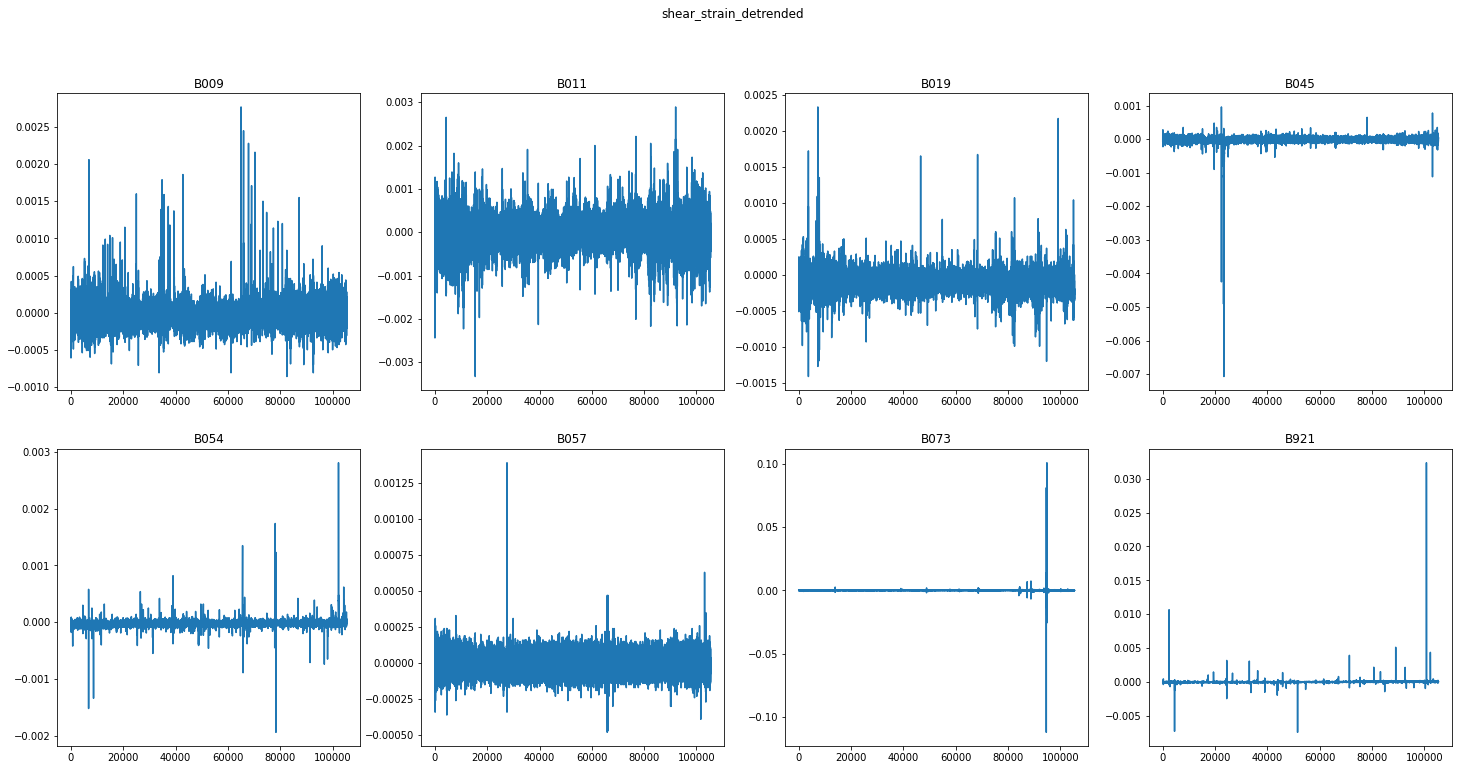

In [18]:
plots( Series ,namesofSeries , feat)

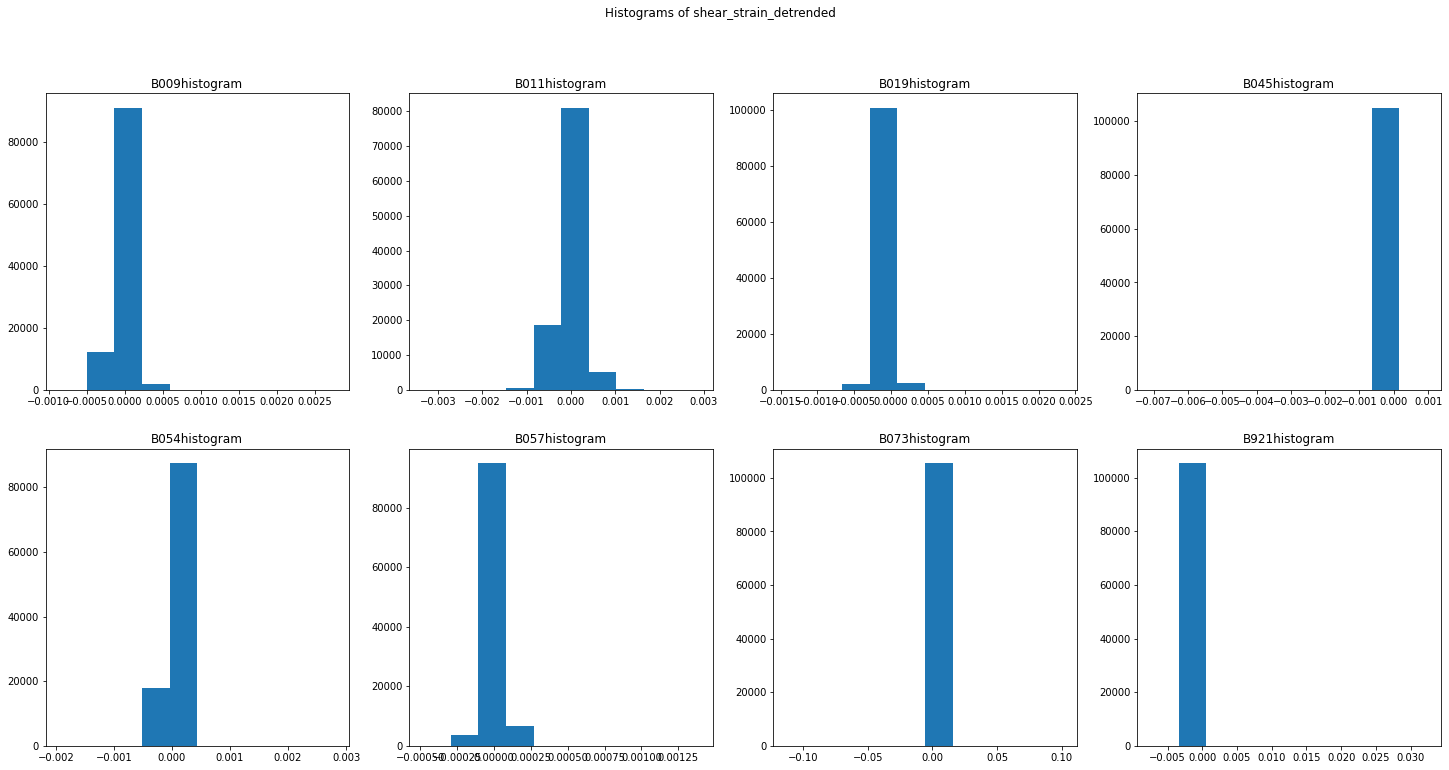

In [19]:
plot_histogram( Series ,namesofSeries , feat)

## areal strain analysis 

In [20]:
feat = 'areal_strain_detrended'
Series , namesofSeries = get_series(prep.data , feat, stations)

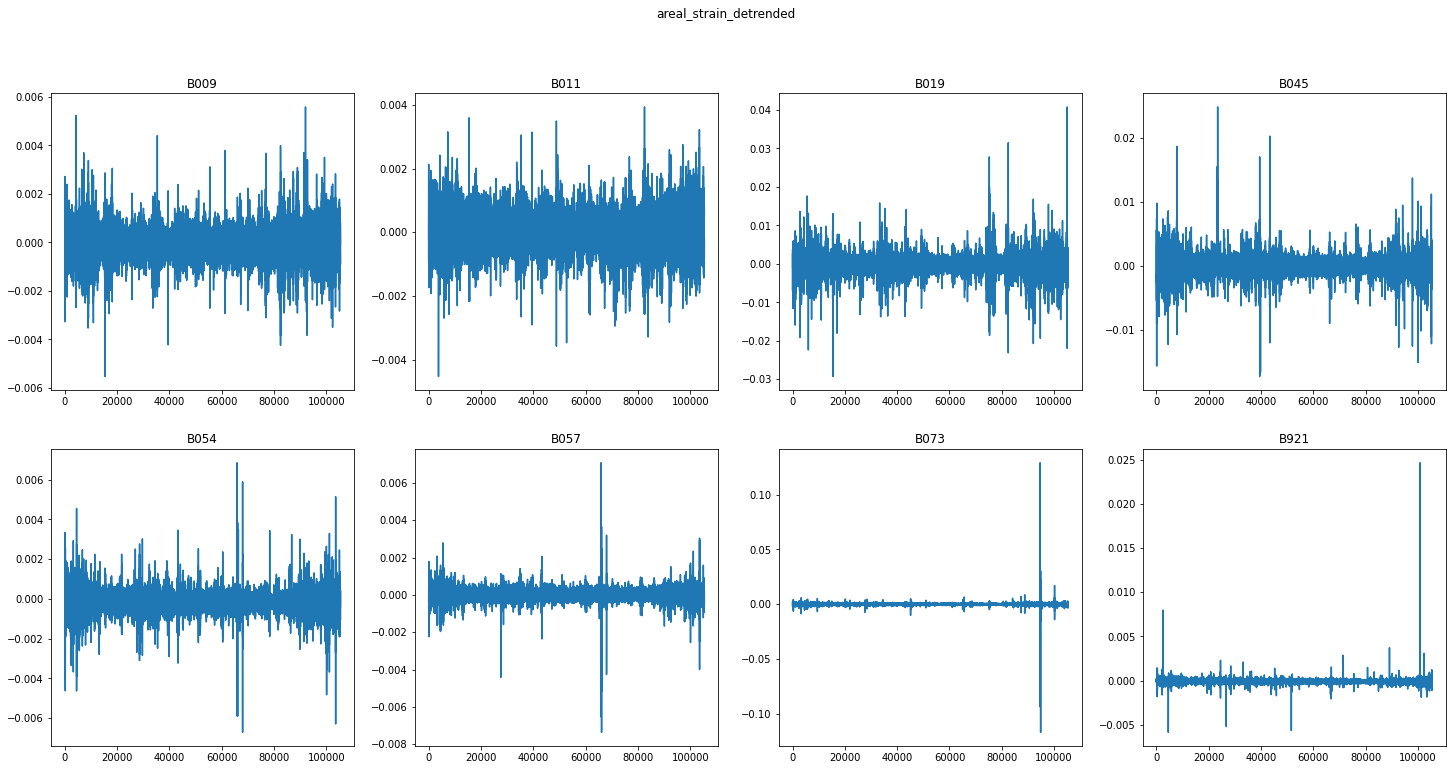

In [21]:
plots( Series ,namesofSeries , feat)

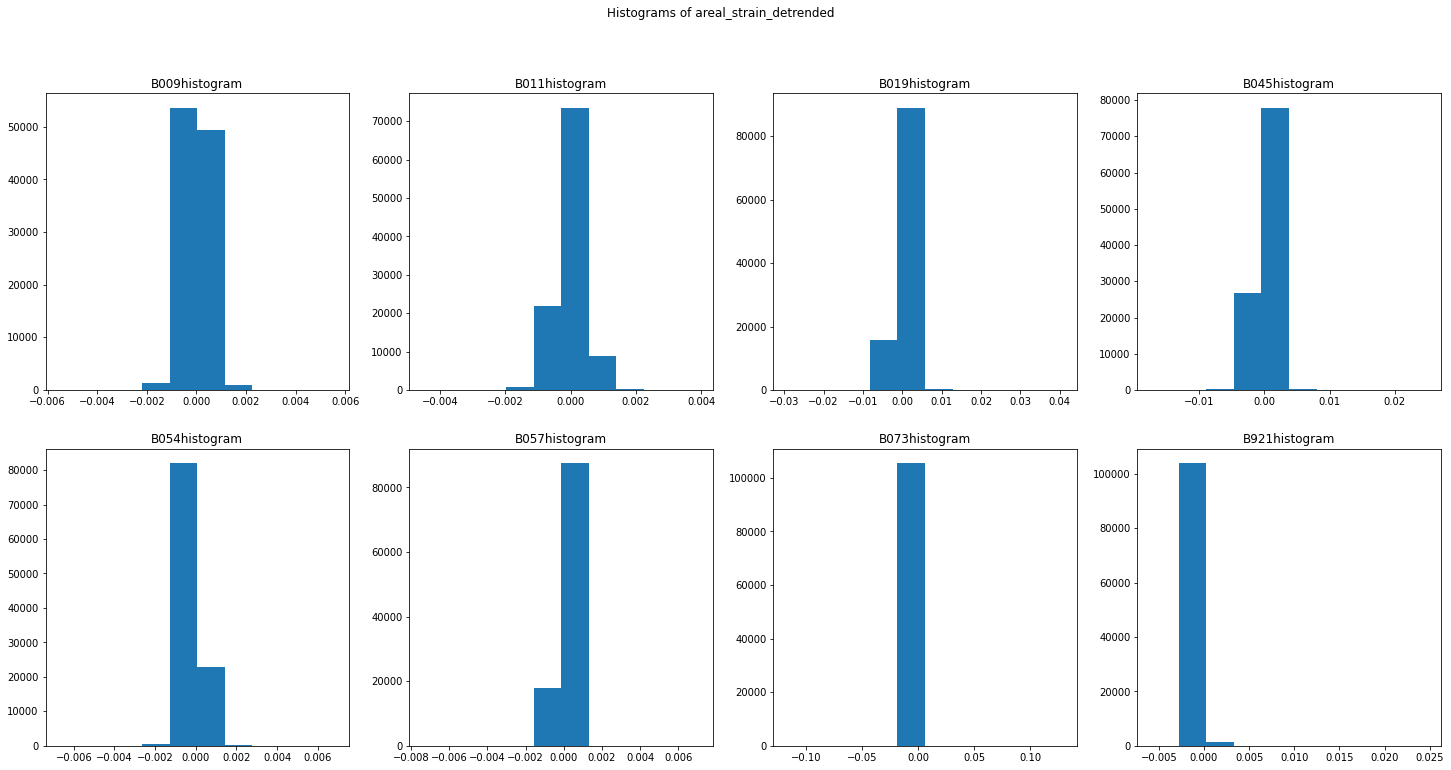

In [22]:
plot_histogram( Series ,namesofSeries , feat)

# Time series clustering using the sequencer

## One Station 

### Based on Ground Truth Values

In [71]:
feat = 'areal_strain_detrended'
station = 'B073'
window_size = 12*24

def get_time_chunks(data , feat , window_size , station) : 
    df = data.copy() 
    for step in range(window_size) : 
        df[f'{feat}_{station}_(t-{step})'] = df[f'{feat}_{station}'].shift(step) 
    df.dropna(inplace =True)
    cols = [f'{feat}_{station}_(t-{step})' for step in range(window_size-1,-1 , -1)]
    series = df[cols].values 
    return series

In [72]:
# sampling N row from the whole dataset
series = get_time_chunks(prep.data , feat  , window_size , station)
n = 12*24
input_data_index = random.sample(range(len(series)),n) 
input_data = series[input_data_index]

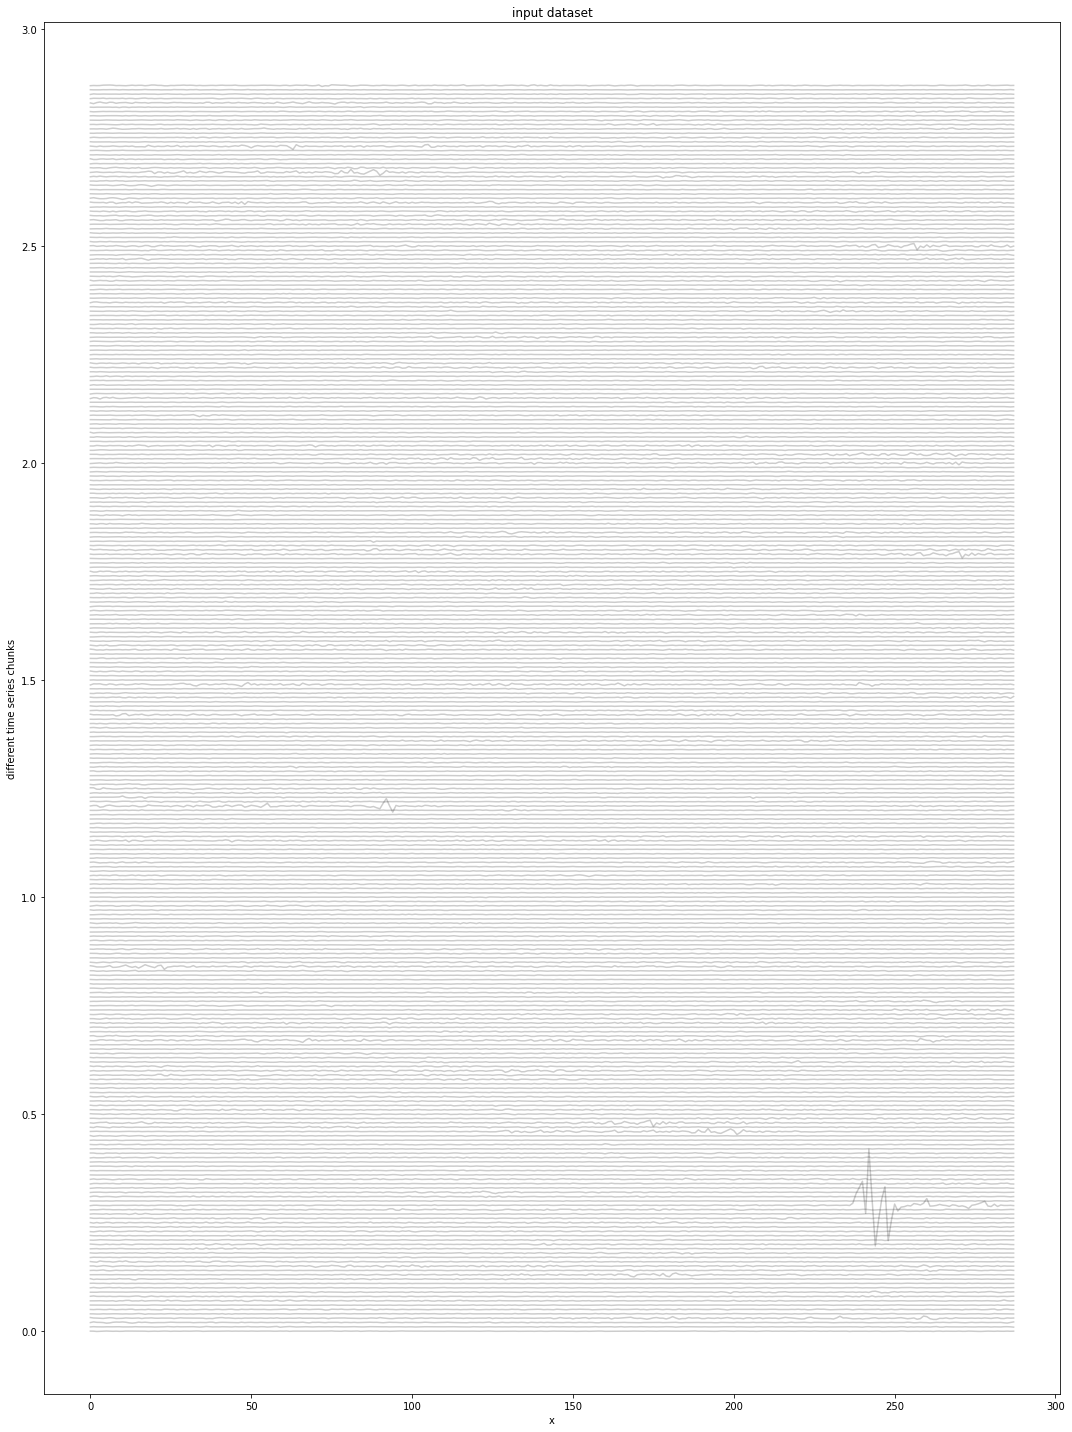

In [73]:
# visualize the input dataset as separate objects
plt.figure(1, figsize=(15, 20))
plt.title("input dataset")
for i, object_data in enumerate(input_data):
    object_data_scaled_y = object_data + i*.01 # scale the objects so they will not be one on top of the other
    plt.plot(object_data_scaled_y, "k",alpha=0.2)
    
plt.xlabel("x")
plt.ylabel("different time series chunks")

plt.tight_layout()

In [74]:
plt.figure(1, figsize=(15, 14))
plt.title("input dataset")
plt.pcolormesh(input_data,cmap=plt.cm.RdYlBu)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("index")
plt.tight_layout()

In [75]:
estimator_list = ['EMD', 'energy']
scale_list = [[1], [1]]
grid = np.arange(0,len(input_data),1)
seq = sequencer.Sequencer(grid , input_data - input_data.min(), estimator_list,scale_list=scale_list)
output_path = "sequencer_output_directory"
final_elongation, final_sequence = seq.execute(output_path)

calculating the distance matrices for estimator: EMD, scale: 1
finished calculating this distance matrix list, it took: 3.1783714294433594 seconds
calculating the distance matrices for estimator: energy, scale: 1
finished calculating this distance matrix list, it took: 3.2583096027374268 seconds
dumped the distance matrix dictionaries to the file: sequencer_output_directory/distance_matrices.pkl
strating to sequence the different scales and estimators
in estimator: EMD, scale: 1
in estimator: energy, scale: 1
dumped the elongations to the file: sequencer_output_directory/elongations.pkl
dumped the full weighted distance matrix to the file: sequencer_output_directory/weighted_distance_matrix.pkl


/home/naim/.conda/envs/naim/lib/python3.8/site-packages/sequencer/sequencer_.py:1025: RuntimeWarning: divide by zero encountered in true_divide
  distance_matrix = 1.0 / proximity_matrix_copy


dumped the sparse distance matrix to the file: <_io.BufferedWriter name='sequencer_output_directory/sparse_distance_matrix.pkl'>
dumped the final sequences and elongation to the file: <_io.BufferedWriter name='sequencer_output_directory/final_products.pkl'>


In [76]:
estimator_list, scale_list, elongation_list = seq.return_elongation_of_weighted_products_all_metrics_and_scales()
for i in range(len(estimator_list)):
    print("metric=%s, scale=%s, elongation: %s" % (estimator_list[i], 
                                                   scale_list[i], 
                                                   elongation_list[i]))

metric=EMD, scale=1, elongation: 21.585816936728396
metric=energy, scale=1, elongation: 20.28978587962963


In [77]:
# order the input dataset according to the detected sequence
objects_list_ordered = input_data[final_sequence]
# visualize the ordered dataset
plt.figure(1, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("input dataset")
plt.pcolormesh(input_data,cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("original index")

plt.subplot(1, 2, 2)
plt.title("ordered dataset")
plt.pcolormesh(objects_list_ordered,cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("original index")
plt.tight_layout()

In [78]:
final_mst = seq.return_final_MST()
plt.figure(1, figsize=(18, 18))
plt.title("Final MST")
pos = nx.kamada_kawai_layout(final_mst)
nx.draw_networkx(final_mst, pos, node_color="red", node_size=40)

# Multi Stations

In [89]:
feat = 'areal_strain_detrended'
window_size = 12*24

In [90]:
all_series = []
n = 2*24
input_data_index = random.sample(range(len(series)),n) 
stations = ['B009', 'B011', 'B019', 'B054', 'B057', 'B073']
for station in stations: 
    series = get_time_chunks(prep.data , feat  , window_size , station)
    input_data = series[input_data_index]
    all_series.append(input_data) 
input_data = np.concatenate(all_series)

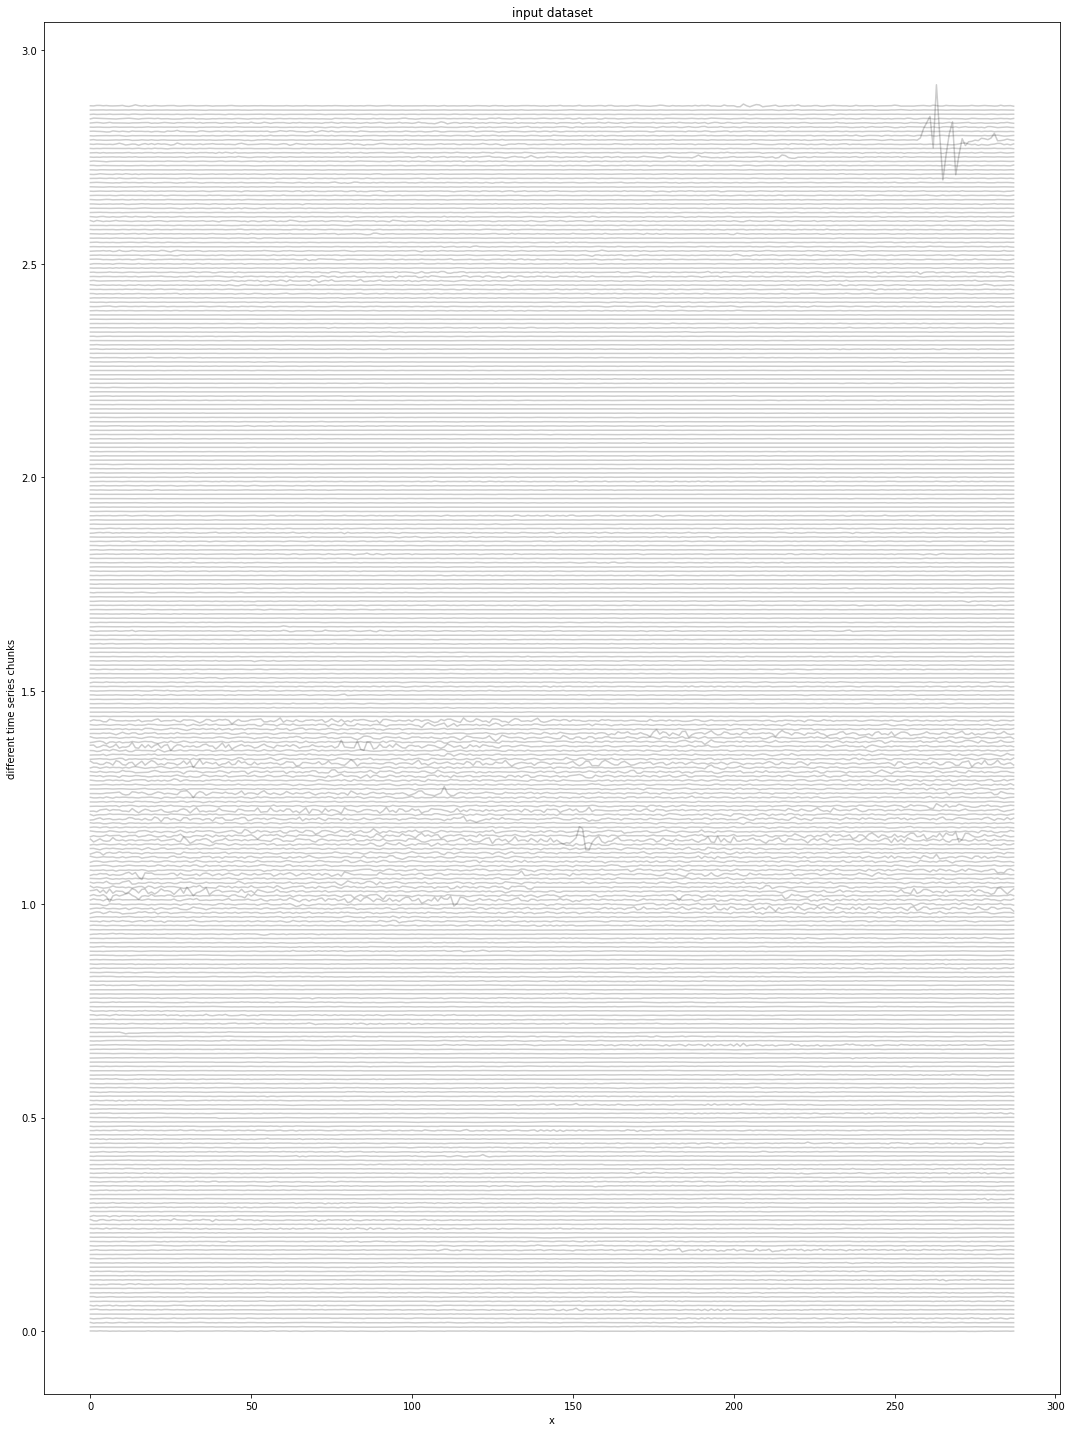

In [91]:
# visualize the input dataset as separate objects
plt.figure(1, figsize=(15, 20))
plt.title("input dataset")
for i, object_data in enumerate(input_data):
    object_data_scaled_y = object_data + i*.01 # scale the objects so they will not be one on top of the other
    plt.plot(object_data_scaled_y, "k",alpha=0.2)
    
plt.xlabel("x")
plt.ylabel("different time series chunks")

plt.tight_layout()

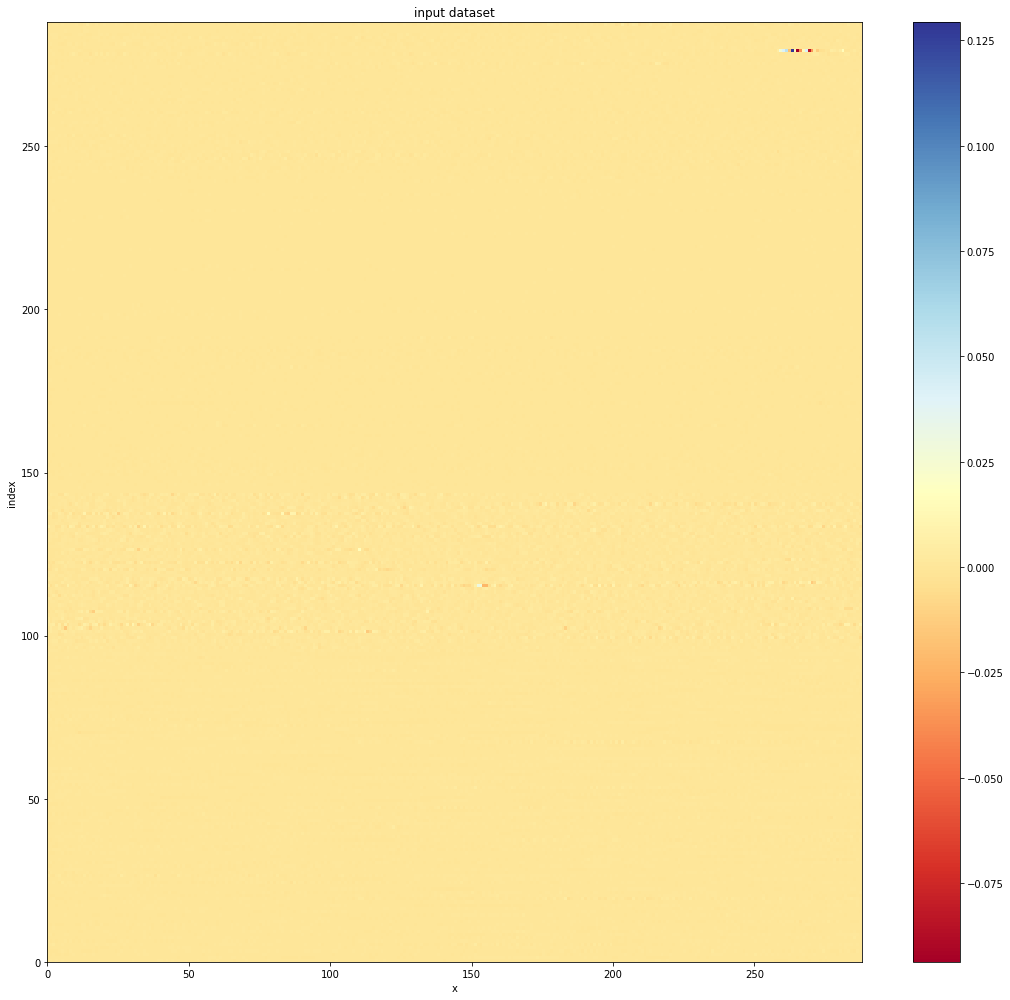

In [92]:
plt.figure(1, figsize=(15, 14))
plt.title("input dataset")
plt.pcolormesh(input_data,cmap=plt.cm.RdYlBu)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("index")
plt.tight_layout()

In [93]:
estimator_list = ['EMD', 'energy']
scale_list = [[1], [1]]
grid = np.arange(0,len(input_data),1)
seq = sequencer.Sequencer(grid , input_data - input_data.min(), estimator_list,scale_list=scale_list)
output_path = "sequencer_output_directory"
final_elongation, final_sequence = seq.execute(output_path)

calculating the distance matrices for estimator: EMD, scale: 1
finished calculating this distance matrix list, it took: 3.0264837741851807 seconds
calculating the distance matrices for estimator: energy, scale: 1
finished calculating this distance matrix list, it took: 3.288743495941162 seconds
dumped the distance matrix dictionaries to the file: sequencer_output_directory/distance_matrices.pkl
strating to sequence the different scales and estimators
in estimator: EMD, scale: 1
in estimator: energy, scale: 1
dumped the elongations to the file: sequencer_output_directory/elongations.pkl
dumped the full weighted distance matrix to the file: sequencer_output_directory/weighted_distance_matrix.pkl


/home/naim/.conda/envs/naim/lib/python3.8/site-packages/sequencer/sequencer_.py:1025: RuntimeWarning: divide by zero encountered in true_divide
  distance_matrix = 1.0 / proximity_matrix_copy


dumped the sparse distance matrix to the file: <_io.BufferedWriter name='sequencer_output_directory/sparse_distance_matrix.pkl'>
dumped the final sequences and elongation to the file: <_io.BufferedWriter name='sequencer_output_directory/final_products.pkl'>


In [94]:
estimator_list, scale_list, elongation_list = seq.return_elongation_of_weighted_products_all_metrics_and_scales()
for i in range(len(estimator_list)):
    print("metric=%s, scale=%s, elongation: %s" % (estimator_list[i], 
                                                   scale_list[i], 
                                                   elongation_list[i]))

metric=EMD, scale=1, elongation: 10.117356288580247
metric=energy, scale=1, elongation: 9.681809413580245


In [95]:
# order the input dataset according to the detected sequence
objects_list_ordered = input_data[final_sequence]

# visualize the ordered dataset
plt.figure(1, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("input dataset")
plt.pcolormesh(input_data,cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("original index")

plt.subplot(1, 2, 2)
plt.title("ordered dataset")
plt.pcolormesh(objects_list_ordered,cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("original index")

plt.tight_layout()

In [96]:
final_mst = seq.return_final_MST()
plt.figure(1, figsize=(18, 18))
plt.title("Final MST")
pos = nx.kamada_kawai_layout(final_mst)
nx.draw_networkx(final_mst, pos, node_color="red", node_size=40)

In [97]:
sorted_data_frame = pd.DataFrame()
sorted_data_frame['index'] = [x for x in pos.keys()]
sorted_data_frame['x_axis'] = [pos[ind][0] for ind in pos.keys()]
sorted_data_frame['y_axis'] = [pos[ind][1] for ind in pos.keys()]
sorted_data_frame['Station'] = [stations[i//n] for i in range(len(sorted_data_frame))]
sorted_data_frame.head()

index    x_axis    y_axis Station
0      0  0.252123  0.303888    B009
1      1 -0.097713 -0.200100    B009
2      2 -0.143014 -0.017886    B009
3      3  0.137484  0.287156    B009
4      4  0.023054  0.044608    B009

## Graph clustring using K-means

In this part, we will use the elbow method to find out the optimal number of clusters 

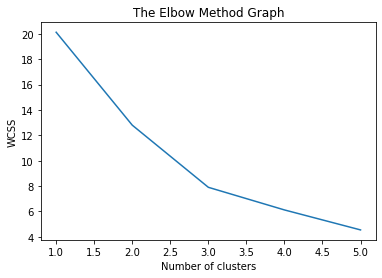

In [98]:
from sklearn.cluster import KMeans
X = sorted_data_frame[["x_axis","y_axis"]].values
wcss=[]

for i in range(1,6): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,6),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to the Elbow graph we deterrmine the clusters number as 3.

In [99]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)

In [100]:
sorted_data_frame['cluster'] = y_kmeans

In [101]:
color_panel = {0:'red' , 1:'blue' , 2:'green' , 3:'cyan' }
def get_color(x) : 
    return color_panel[x]
sorted_data_frame['color'] = sorted_data_frame['cluster'].apply(get_color)

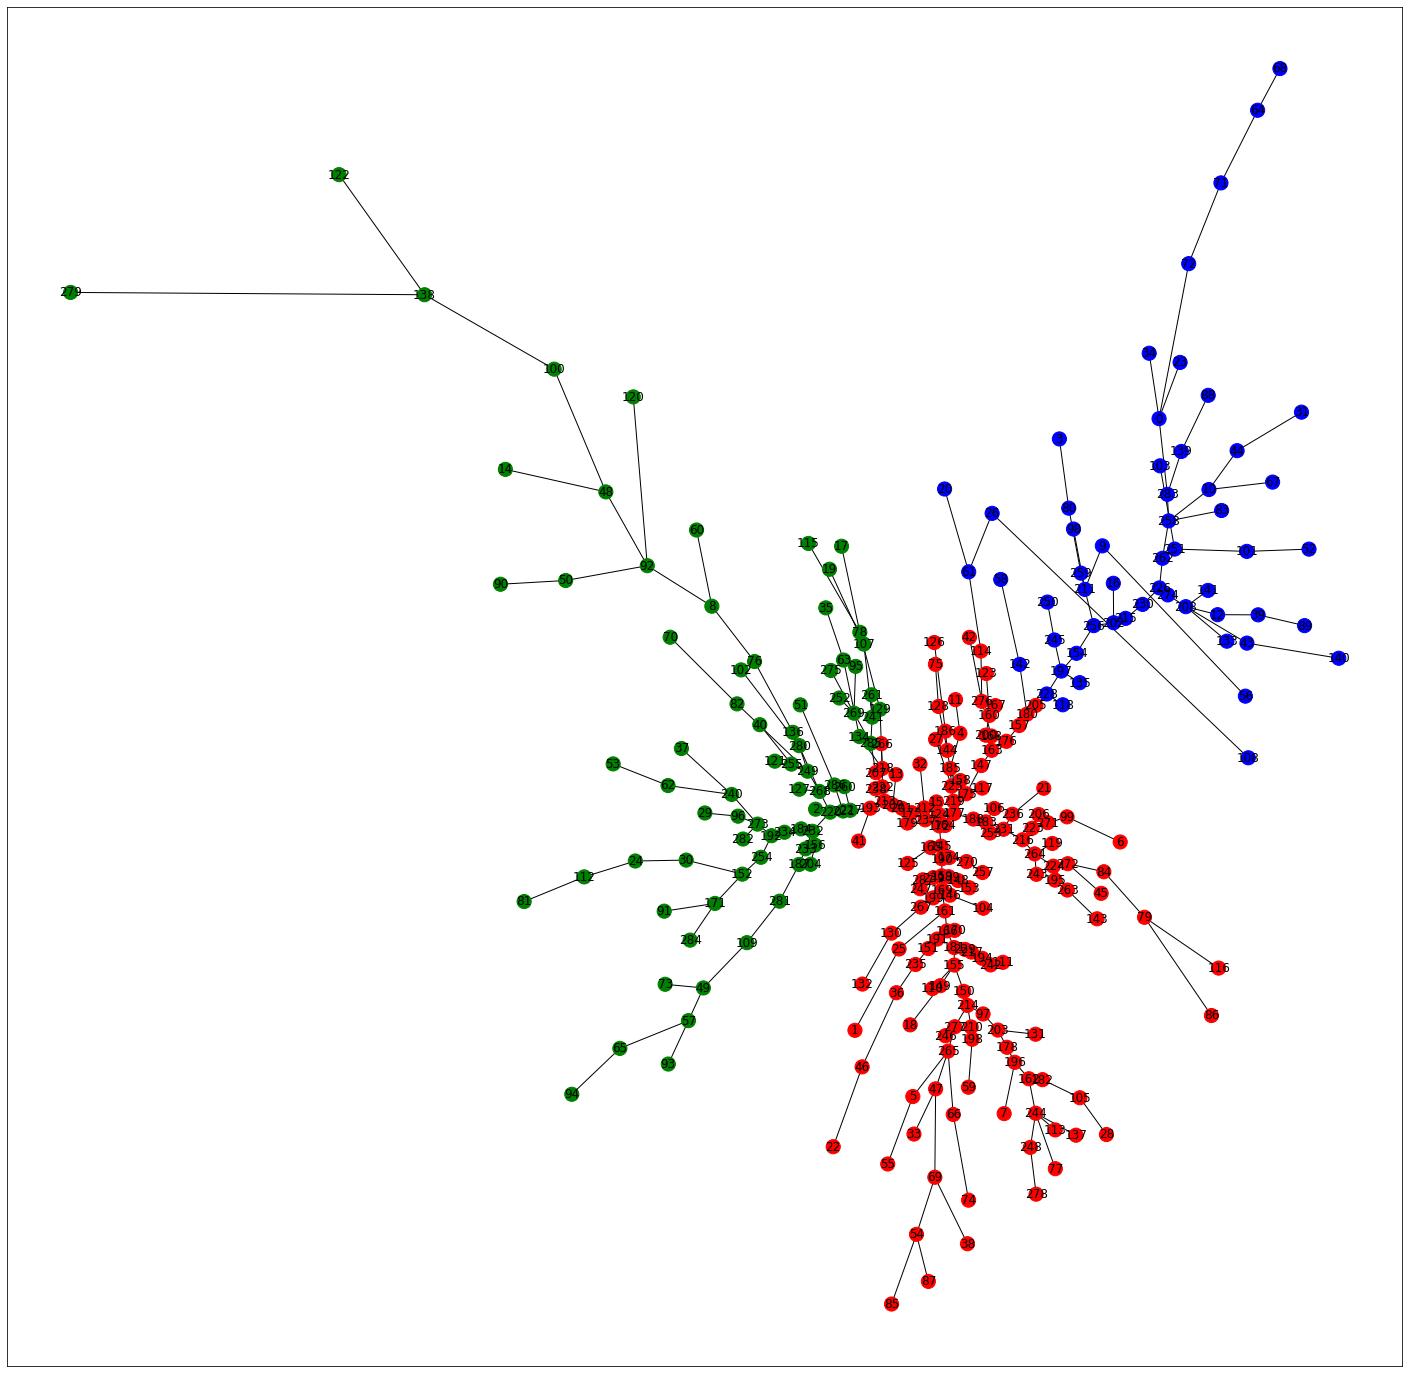

In [102]:
plt.figure(1, figsize=(25, 25))
nx.draw_networkx(final_mst, pos, node_color=sorted_data_frame['color'].values, node_size=200)

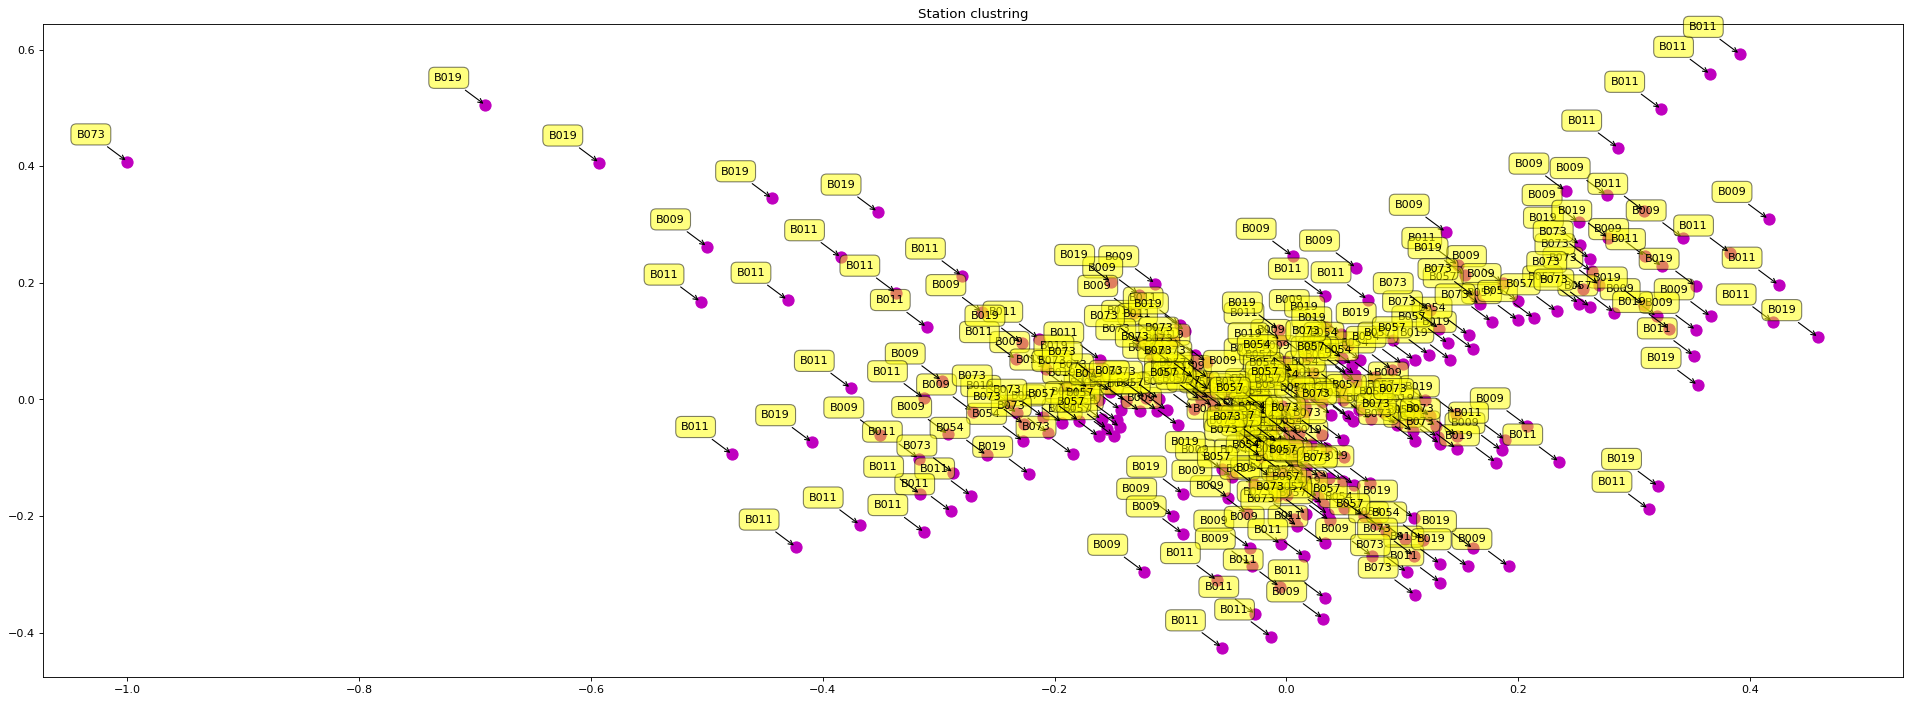

In [103]:
plt.figure(figsize=(30, 12), dpi=80)
plt.subplots_adjust(bottom = 0.2)
plt.scatter(
    sorted_data_frame['x_axis'], sorted_data_frame['y_axis'], marker='o', s=100, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Station clustring')

for label, x, y in zip(sorted_data_frame.Station,sorted_data_frame['x_axis'],sorted_data_frame['y_axis']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    );

# Multivariate Time Series Clustering

In [46]:
## The Idea here is to use the Multivariate Time Series Clustering to identify the different behaviors of the signal 

### Time Series Clustring Using Auto-Encoders 

We can perform times series clustrin with tow step. First we train an autoencoder to map the input times series to a laten vector. we can use then the laten space vector as an input to a clustring algorithm. 

![](https://nhoues.github.io/Water-Level-Forecasting/images/clustring.png)

In [47]:
# work in progress 

In [48]:
import torch 
import torch.nn as nn 

import numpy as np

import torch
from torch import nn, optim


class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):

        super(Encoder, self).__init__()
        self.init_batchnorm = TimeDistributed(
            nn.BatchNorm1d(input_size, momentum=0.01), batch_first=True
        )

        self.lstm_1 = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            batch_first=True,
            bidirectional=True,
        )

        self.lstm_2 = nn.LSTM(
            input_size=hidden_size * 2,
            hidden_size=hidden_size,
            batch_first=True,
            bidirectional=False,
        )

    def forward(self, x):
        x = self.init_batchnorm(x)
        x, _ = self.lstm_1(x)
        x, _ = self.lstm_2(x)
        return x


class AutoEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, emb_size):
        super(AutoEncoder, self).__init__()

        self.hidden_size = hidden_size
        self.encoder = Encoder(input_size, hidden_size)
        self.mapping_layer = TimeDistributed(
            nn.Sequential(
                nn.Linear(hidden_size, hidden_size // 2),
                nn.ReLU(),
                nn.Linear(hidden_size // 2, emb_size),
                nn.ReLU(),
            )
        )
        self.decoder = Encoder(emb_size, input_size)

    def forward(self, x):
        x = self.encoder(x)
        x_map = self.mapping_layer(x)
        x = self.decoder(x_map)
        return x, x_map


class LSTMAutoEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, emb_size):
        super(LSTMAutoEncoder, self).__init__()

        self.day_emb = nn.Embedding(7, 4)
        self.month_emb = nn.Embedding(13, 4)

        self.init_batchnorm = TimeDistributed(nn.BatchNorm1d(input_size, momentum=0.01))

        self.auto_encoder = AutoEncoder(input_size, hidden_size, emb_size)

        self.LSTM1 = nn.LSTM(
            input_size=emb_size + 8,
            hidden_size=hidden_size,
            batch_first=True,
            bidirectional=True,
        )

        self.LSTM2 = nn.LSTM(
            input_size=hidden_size * 2,
            hidden_size=hidden_size,
            batch_first=True,
            bidirectional=True,
        )

        self.fc = nn.Sequential(
            nn.Linear(2 * hidden_size, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, 1),
        )

    def forward(self, enc, day, month):
        day = self.day_emb(day)
        month = self.month_emb(month)
        enc = self.init_batchnorm(enc)
        x_rec, x_map = self.auto_encoder(enc)
        x_map = torch.cat([x_map, month, day], dim=2)
        x_hat, _ = self.LSTM1(x_map)
        x_hat, _ = self.LSTM2(x_hat)
        x_hat = self.fc(x_hat[:, -1, :])
        return x_hat, x_rec